<a href="https://colab.research.google.com/github/cnapole/AirConditionerFuzzyLogic/blob/main/AirConditionerWagon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MISO example: 2 inputs 1 output
#The problem is: How can we control an air conditioner intensity of a metro (i.e. 1 wagon) based on the amount of people and size?
#Therefore, 2 inputs: place size (10-20 meters) and amount of people (0 - 60 people)
#Output: air conditioner intensity (0-1 normalized)
#the ouput is the
#Useful links:
#https://pythonhosted.org/scikit-fuzzy/

In [ ]:
#scikit-fuzzy instalation
!pip install -q scikit-fuzzy

# #ipython-autotime. The goal is to measure the execution time of blocks
# !pip install -q ipython-autotime
# %load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.backends.backend_svg

In [ ]:
# Variables and their universe definition
x_placesize = np.arange(10, 21, 1,dtype = int)
x_peopleamount = np.arange(0, 61, 1,dtype = int)

x_intensity = np.arange(0, 1.1, 0.1)

#Input fuzzy variables creation (antecedent)
PlaceSize = ctrl.Antecedent(x_placesize, 'PlaceSize')
PeopleAmount = ctrl.Antecedent(x_peopleamount, 'PeopleAmount')

#Output fuzzy variables creation (consequent)
Intensity = ctrl.Consequent(x_intensity, 'Intensity')

In [ ]:
#Triangular membership functions
# PlaceSize fuzzy sets
PlaceSize['low'] = fuzz.trimf(PlaceSize.universe, [10, 10, 15])
PlaceSize['mid'] = fuzz.trimf(PlaceSize.universe, [10, 15, 20])
PlaceSize['high'] = fuzz.trimf(PlaceSize.universe, [15, 20, 20])

# PeopleAmount fuzzy sets
PeopleAmount['low'] = fuzz.trimf(PeopleAmount.universe, [0, 0, 30])
PeopleAmount['mid'] = fuzz.trimf(PeopleAmount.universe, [0, 30, 60])
PeopleAmount['high'] = fuzz.trimf(PeopleAmount.universe, [30, 60, 60])

#Intensity fuzzy sets
Intensity['low'] = fuzz.trimf(Intensity.universe, [0, 0, 0.5])
Intensity['mid'] = fuzz.trimf(Intensity.universe, [0, 0.5, 1])
Intensity['high'] = fuzz.trimf(Intensity.universe, [0.5, 1, 1])

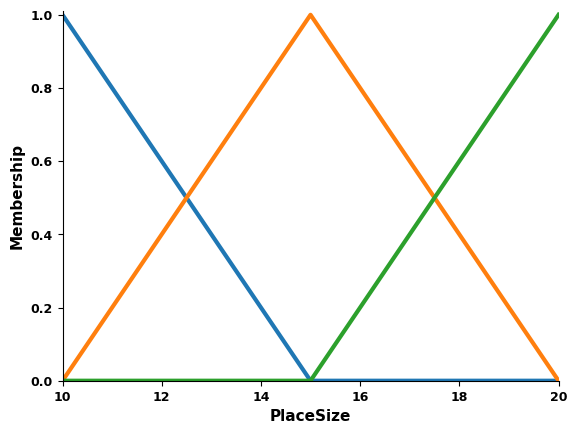

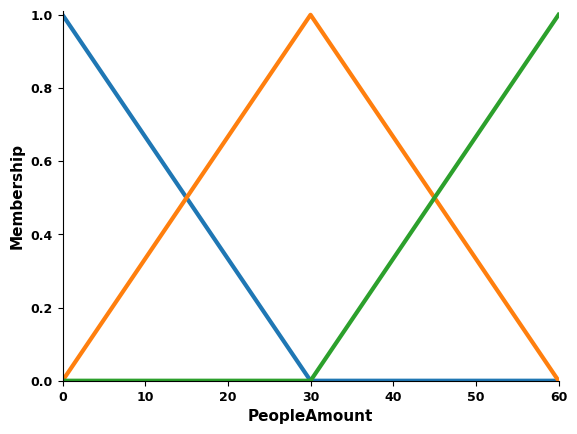

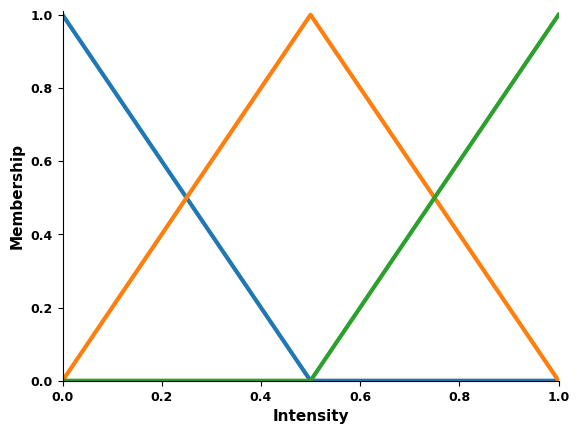

In [ ]:
#Membership rules view
PlaceSize.view()
yaxis = plt.ylabel('Membership', fontsize = 11, weight = 'bold')
xaxis = plt.xlabel('PlaceSize', fontsize = 11, weight = 'bold')
for line in plt.gca().lines:
    line.set_linewidth(3)
legend = plt.legend()
legend.remove()
#plt.savefig('/content/gdrive/My Drive/Stat AI solutions/FuzzyLogic&AI_Demo/Slides/02ElementsOfFuzzyLogic/2cFuzzInfDefuzzImages/2cMembershipFunctionsGraphs/PlaceSizeMembership.tiff')

PeopleAmount.view()
yaxis = plt.ylabel('Membership', fontsize = 11, weight = 'bold')
xaxis = plt.xlabel('PeopleAmount', fontsize = 11, weight = 'bold')
legend = plt.legend()
legend.remove()
for line in plt.gca().lines:
    line.set_linewidth(3)
legend = plt.legend()
legend.remove()
#plt.savefig('/content/gdrive/My Drive/Stat AI solutions/FuzzyLogic&AI_Demo/Slides/02ElementsOfFuzzyLogic/2cFuzzInfDefuzzImages/2cMembershipFunctionsGraphs/PeopleAmountMembership.tiff')


Intensity.view()
fontsize =plt.rc('font', size=9, weight = 'bold')
yaxis = plt.ylabel('Membership', fontsize = 11, weight = 'bold')
xaxis = plt.xlabel('Intensity', fontsize = 11, weight = 'bold')
for line in plt.gca().lines:
    line.set_linewidth(3)
legend = plt.legend()
legend.remove()
plt.savefig('/content/gdrive/My Drive/Stat AI solutions/FuzzyLogic&AI_Demo/Slides/02ElementsOfFuzzyLogic/2cFuzzInfDefuzzImages/2cMembershipFunctionsGraphs/IntensityMembership.tiff')


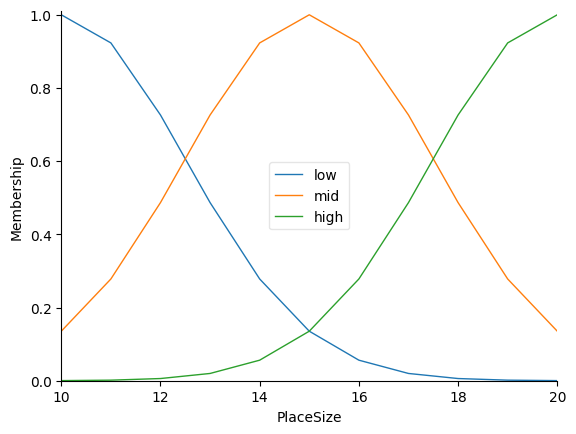

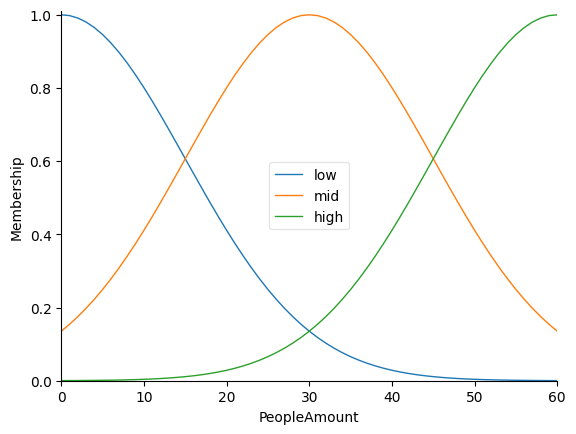

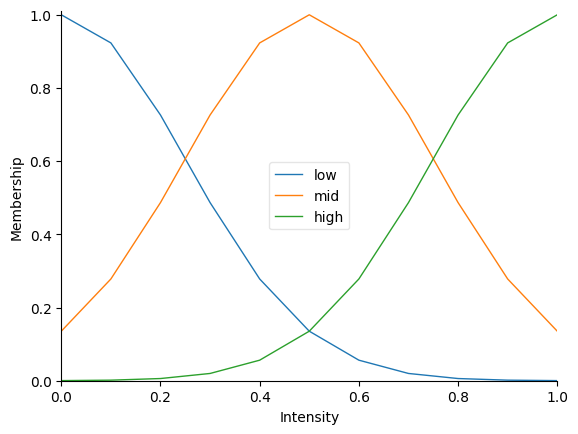

time: 837 ms (started: 2023-07-09 10:43:09 +00:00)


In [ ]:
#Gaussian bells membership functions

# PlaceSize fuzzy sets
PlaceSize['low'] = fuzz.gaussmf(PlaceSize.universe, 10,2.5)
PlaceSize['mid'] = fuzz.gaussmf(PlaceSize.universe, 15,2.5)
PlaceSize['high'] = fuzz.gaussmf(PlaceSize.universe, 20,2.5)

# PeopleAmount fuzzy sets
PeopleAmount['low'] = fuzz.gaussmf(PeopleAmount.universe,0, 15)
PeopleAmount['mid'] = fuzz.gaussmf(PeopleAmount.universe,30, 15)
PeopleAmount['high'] = fuzz.gaussmf(PeopleAmount.universe,60,15)

#Intensity fuzzy sets
Intensity['low'] = fuzz.gaussmf(Intensity.universe, 0, 0.25)
Intensity['mid'] = fuzz.gaussmf(Intensity.universe, 0.5, 0.25)
Intensity['high'] = fuzz.gaussmf(Intensity.universe, 1, 0.25)

PlaceSize.view()
PeopleAmount.view()
Intensity.view()

In [ ]:
#Membership rules view

#  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
#  fig.tight_layout()

#  ax0.plot(x_placesize, PlaceSize['low'],'b', label = 'low')
# ax0.plot(x_placesize, PlaceSize['mid'],'g', label = 'mid')
# ax0.plot(x_placesize, PlaceSize['high'],'r', label = 'high')
# ax0.set_title('Input: PlaceSize')
# ax0.legend()

# ax1.plot(x_peopleamount, PeopleAmount['low'],'b', label = 'low')
# ax1.plot(x_peopleamount, PeopleAmount['mid'],'g', label = 'mid')
# ax1.plot(x_peopleamount, PeopleAmount['high'],'r', label = 'high')
# ax1.set_title('Input: PeopleAmount')
# ax1.legend()

# ax2.plot(x_intensity, Intensity['low'],'b', label = 'low')
# ax2.plot(x_intensity, Intensity['mid'],'g', label = 'mid')
# ax2.plot(x_intensity, Intensity['high'],'r', label = 'high')
# ax2.set_title('Output: Intensity')
# ax2.legend()

In [ ]:
# If-then base rules
# The structure is (for example for the first case) "if PlaceHigh is high & PeopleAmount is high, the intensity should be high"
rule1 = ctrl.Rule(PlaceSize['high'] & PeopleAmount['high'] , Intensity['high'])
rule2 = ctrl.Rule(PlaceSize['mid'] & PeopleAmount['high'] , Intensity['high'])
rule3 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['high'] , Intensity['high'])
rule4 = ctrl.Rule(PlaceSize['mid'] & PeopleAmount['mid'] , Intensity['mid'])
rule5 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['mid'] , Intensity['mid'])
rule6 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['low'] , Intensity['low'])
rule7 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['high'] , Intensity['low'])
rule8 = ctrl.Rule(PlaceSize['mid'] & PeopleAmount['low'] , Intensity['low'])
rule9 = ctrl.Rule(PlaceSize['high'] & PeopleAmount['low'] , Intensity['low'])

#All rules added in an array for further actions
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]
# The fuzzy rules are added to the ctrl system
AirCondControl = ctrl.ControlSystem(rules)

0.6653209760184313


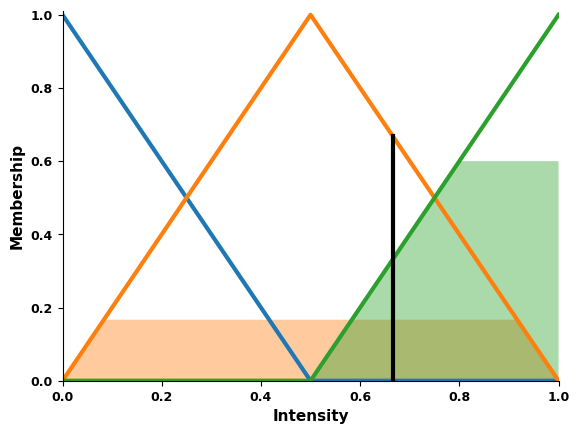

In [ ]:
# Fuzzy logic simulation creation
AirCondSim = ctrl.ControlSystemSimulation(AirCondControl)

# Evaluation
#Remember that:
#PlaceSize = 10 to 20
#PeopleAmount = 0 to 60

#Inputs to be added in the AirCondSim simulation
AirCondSim.input['PlaceSize'] = 17
AirCondSim.input['PeopleAmount'] = 55
AirCondSim.compute()

# Output calculation based on PlaceSize and PeopleAmount
print(AirCondSim.output['Intensity'])
Intensity.view(sim=AirCondSim)
fontsize =plt.rc('font', size=9, weight = 'bold')
yaxis = plt.ylabel('Membership', fontsize = 11, weight = 'bold')
xaxis = plt.xlabel('Intensity', fontsize = 11, weight = 'bold')
for line in plt.gca().lines:
    line.set_linewidth(3)
legend = plt.legend()
legend.remove()
plt.savefig('/content/gdrive/My Drive/Stat AI solutions/FuzzyLogic&AI_Demo/Slides/02ElementsOfFuzzyLogic/2cFuzzInfDefuzzImages/2cMembershipFunctionsGraphs/IntensityOutput.tiff')


In [ ]:
#PRUEBA PARA EXPORT!!!!!!!!!!!!!!

# PlaceSize fuzzy sets
PlaceSize['low'] = fuzz.gaussmf(PlaceSize.universe, 10,2.5)
PlaceSize['mid'] = fuzz.gaussmf(PlaceSize.universe, 15,2.5)
PlaceSize['high'] = fuzz.gaussmf(PlaceSize.universe, 20,2.5)

# PeopleAmount fuzzy sets
PeopleAmount['low'] = fuzz.gaussmf(PeopleAmount.universe,0, 15)
PeopleAmount['mid'] = fuzz.gaussmf(PeopleAmount.universe,30, 15)
PeopleAmount['high'] = fuzz.gaussmf(PeopleAmount.universe,60,15)

#Intensity fuzzy sets
Intensity['low'] = fuzz.gaussmf(Intensity.universe, 0, 0.25)
Intensity['mid'] = fuzz.gaussmf(Intensity.universe, 0.5, 0.25)
Intensity['high'] = fuzz.gaussmf(Intensity.universe, 1, 0.25)

PlaceSize.view()
PeopleAmount.view()
Intensity.view()

NameError: ignored